In [2]:
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
key_file = {'test_image':  'Mnist\\t10k-images-idx3-ubyte (1).gz',
            'test_label':   'Mnist\\t10k-labels-idx1-ubyte (1).gz'

}

image_size = 28*28

model_name = 'sample_weight.pkl'

In [4]:
def load_images(file_name):
    with gzip.open(file_name, 'rb') as f:
        images = np. frombuffer(f.read(), np.uint8, offset =16)
    images = images.reshape(-1, image_size)

    print(file_name)
    return images    

In [5]:
def load_label(file_name):
    with gzip.open(file_name, 'rb',) as f:
        labels = np. frombuffer(f.read(), np.uint8, offset = 8)
    return labels    

In [6]:
key_file['test_image']

'Mnist\\t10k-images-idx3-ubyte (1).gz'

In [7]:
import os
os.getcwd() 

"d:\\Nural Networks\\ece5831-2023- HW's\\Assignment 5"

In [31]:
##@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
from PIL import Image

image_path = r"D:\Nural Networks\ece5831-2023- HW's\Assignment 5\4_4.png"

test_image_0 = Image.open(image_path).convert("L")
images0 = np.array(test_image_0)
images0 = images0.reshape(-1,image_size )

In [32]:
images0.shape

(1, 784)

In [9]:
x_test = load_images (key_file['test_image'])

Mnist\t10k-images-idx3-ubyte (1).gz


In [10]:
x_test.shape

(10000, 784)

In [11]:
y_test = load_label(key_file['test_label'])

In [12]:
y_test.shape

(10000,)

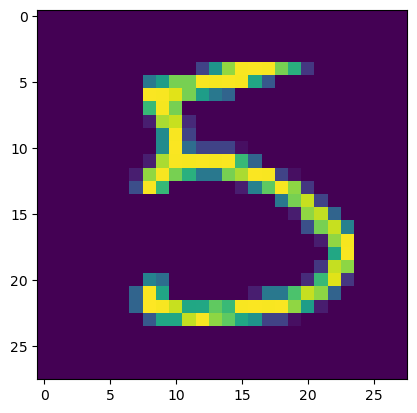

In [37]:
#plt.imshow(x_test[15].reshape(28,28))

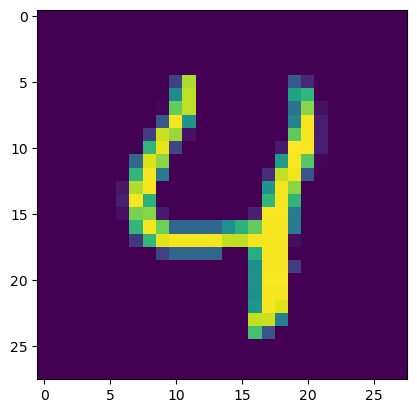

In [33]:
plt.imshow(images0.reshape(28,28))  ## our final test is on images0

In [38]:
#y_test[15]

5

## Networks

In [13]:
import pickle

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [15]:
def softmax(a):
    c= np.max(a)
    a = np.exp(a-c)
    s= np.sum(a)
    y = a/s

    return y

In [16]:
def init_network(model_name):
    with open(model_name, 'rb') as f:
        network = pickle.load(f)

    return network 

In [17]:
network = init_network(model_name)

In [55]:
w1 = network['W1']
w2 = network['W2']
w3 = network['W3']
b1 = network['b1']

In [56]:
w1.shape
b1.shape

(50,)

In [49]:
def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, w3) + b3

    y= softmax(a3)

    return a1



In [51]:
y_hat = predict(network, images0 )

C:\Users\amite\AppData\Local\Temp\ipykernel_40204\4033946986.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


### Tesing , PLaying , Learning

### End Here PLaying Block

In [40]:
y_hat.shape

(1, 10)

In [137]:
y_hat = predict(network, images0 )

C:\Users\amite\AppData\Local\Temp\ipykernel_11208\4033946986.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [41]:
y_hat

array([[7.80105984e-06, 1.16906371e-07, 1.48252089e-04, 3.91145932e-07,
        9.96896386e-01, 1.40100865e-05, 3.35533521e-04, 1.16607021e-04,
        1.05944106e-04, 2.37500784e-03]], dtype=float32)

In [139]:
## Testing Image-4



4
0.9968964


In [133]:
y_test[15]

5

In [140]:
# until now we have tested the images individually
# I have Created a .Py file as a Minst Class
# we'll import the mnist1.py and try to test the module5.py file in this .ipynb.
# For information: 
                  # we can Run the module5.py from the command-line arguments by calling expected two Arguments.

In [ ]:
## Testing of Mnist Class and Module5.py

In [143]:
import sys
import glob
from mnist1 import Mnist

import glob
import mnist1 as mnist1
import numpy as np

In [144]:
def main(image_pattern="*.png", digit=0):
    mnist = mnist1.Mnist()
    mnist.init_network()  # Initialize the neural network from the provided model file

    image_files = glob.glob(image_pattern)

    for image_filename in image_files:
        image = mnist.load_image_jpg(image_filename)  # Load the .jpg image
        predicted_digit = mnist.predict(image)
        predicted_digit = np.argmax(predicted_digit)
        if (predicted_digit == digit).any():
            print(f"Success: Image {image_filename} is for digit {digit} and is recognized as {predicted_digit}.")
        else:
            print(f"Fail: Image {image_filename} is for digit {digit} but the inference result is {predicted_digit}.")

if __name__ == "__main__":
    if len(sys.argv) > 3:
        print("Usage: python module5.py <image_pattern> <digit>")
    else:
        main(sys.argv[1], int(sys.argv[2]))

Usage: python module5.py <image_pattern> <digit>
